Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [56]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [57]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [58]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
 #Look at the data. Choose a feature, and plot its relationship with the target.

In [5]:
df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]

In [14]:
import plotly.express as px

In [44]:
import plotly.express as px
px.scatter(df, y='bedrooms', x='price')

In [16]:
px.scatter(df, x='price', y='bedrooms', trendline='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [36]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [8]:
Y = df['price']
X = df['bedrooms']

In [10]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X = x[:, np.newaxis]
X.shape

(48818, 1)

In [21]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.coef_

array([853.25416753])

In [23]:
model.intercept_

2267.9741491780505

In [24]:
xfit = np.linspace(-1, 11)

In [25]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

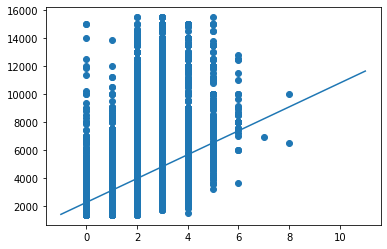

In [45]:
plt.scatter(X, Y)
plt.plot(Xfit, yfit);

In [37]:
y = df['price']
X = df[['bedrooms']]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
from sklearn.metrics import mean_absolute_error

print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE:', mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE: 974.1812125834184
Testing MAE: 980.2232040566545


In [46]:
lr.coef_

array([855.30531892])

In [51]:
def predict(bedroom):
    y_pred = lr.predict([[bedroom]])
    estimate = y_pred[0]
    coefficient = lr.coef_[0]
    result = f'${estimate:,.0f} estimated price for {bedroom:,.0f} bedroom condo in Tribeca.'
    explanation = f'In this linear regression, each additional bedroom adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(3))

$4,827 estimated price for 3 bedroom condo in Tribeca.
In this linear regression, each additional bedroom adds $855.


In [60]:
df = df[["bathrooms", "bedrooms",'price']]

In [68]:
import plotly.express as px
px.scatter(df,y='price', x='bedrooms', trendline='ols')

In [69]:
import plotly.express as px
px.scatter(df,y='price', x='bedrooms', trendline='ols')